In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

url = 'https://www.imdb.com/chart/top/'
header = {
    'User-Agent': 'Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Mobile Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
page = requests.get(url, headers=header)


if page.status_code == 200:
    soup = BeautifulSoup(page.content, 'html.parser')
    
    movies = []
    for i in soup.find_all("script", type="application/ld+json"):
        data = json.loads(i.string)
        a=1
        for item in data.get("itemListElement"):
            movie = {
                    "Rank": a,
                    "Title": item.get("item", {}).get("name"),
                    "URL": item.get("item", {}).get("url"),
                    "Rating": item.get("item", {}).get("aggregateRating", {}).get("ratingValue"),
                    "Content_Rating": item.get("item", {}).get("contentRating"),
                    "Rating_Count": item.get("item", {}).get("aggregateRating", {}).get("ratingCount"),
                    "Genre": item.get("item", {}).get("genre"),
                    "Duration": item.get("item", {}).get("duration").replace("PT", ""),
                    "Description": item.get("item", {}).get("description"),
                }
            movies.append(movie)
            a=a+1
        

 
    for index, movie in enumerate(movies, start=1):
        print(f"Rank: {index}\n"
              f"Title: {movie['Title']}\n"
              f"URL: {movie['URL']}\n"
              f"Rating: {movie['Rating']}\n"
              f"Rating Count: {movie['Rating_Count']}\n"
              f"Content Rating: {movie['Content_Rating']}\n"
              f"Genre: {movie['Genre']}\n"
              f"Duration: {movie['Duration'].replace('PT','')}\n"
              f"Description: {movie['Description']}\n")
else:
    print(f"Failed to fetch data.")

df=pd.DataFrame(movies)
df

Rank: 1
Title: The Shawshank Redemption
URL: https://www.imdb.com/title/tt0111161/
Rating: 9.3
Rating Count: 2991276
Content Rating: R
Genre: Drama
Duration: 2H22M
Description: A banker convicted of uxoricide forms a friendship over a quarter century with a hardened convict, while maintaining his innocence and trying to remain hopeful through simple compassion.

Rank: 2
Title: The Godfather
URL: https://www.imdb.com/title/tt0068646/
Rating: 9.2
Rating Count: 2087766
Content Rating: R
Genre: Crime, Drama
Duration: 2H55M
Description: The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.

Rank: 3
Title: The Dark Knight
URL: https://www.imdb.com/title/tt0468569/
Rating: 9
Rating Count: 2971376
Content Rating: PG-13
Genre: Action, Crime, Drama
Duration: 2H32M
Description: When a menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman, James Gordon and Harvey Dent must work together to put an end to the ma

,Rank,Title,URL,Rating,Content_Rating,Rating_Count,Genre,Duration,Description
0,1,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,9.3,R,2991276,Drama,2H22M,A banker convicted of uxoricide forms a friend...
1,2,The Godfather,https://www.imdb.com/title/tt0068646/,9.2,R,2087766,"Crime, Drama",2H55M,The aging patriarch of an organized crime dyna...
2,3,The Dark Knight,https://www.imdb.com/title/tt0468569/,9.0,PG-13,2971376,"Action, Crime, Drama",2H32M,When a menace known as the Joker wreaks havoc ...
3,4,The Godfather Part II,https://www.imdb.com/title/tt0071562/,9.0,R,1408063,"Crime, Drama",3H22M,The early life and career of Vito Corleone in ...
4,5,12 Angry Men,https://www.imdb.com/title/tt0050083/,9.0,Approved,905364,"Crime, Drama",1H36M,The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...,...
245,246,Amores perros,https://www.imdb.com/title/tt0245712/,8.0,R,258299,"Drama, Thriller",2H34M,"An amateur dog fighter, a supermodel, and a de..."
246,247,The Help,https://www.imdb.com/title/tt1454029/,8.1,PG-13,506387,Drama,2H26M,An aspiring author during the civil rights mov...
247,248,Rebecca,https://www.imdb.com/title/tt0032976/,8.1,Approved,151077,"Drama, Mystery, Romance",2H10M,A self-conscious woman juggles adjusting to he...
248,249,Koe no katachi,https://www.imdb.com/title/tt5323662/,8.1,Not Rated,112902,"Animation, Drama",2H10M,"A deaf girl, Shoko, is bullied by the popular ..."


In [2]:
x1 = df['Content_Rating'].value_counts()
print(x1)


Content_Rating
R            101
PG            39
PG-13         35
Not Rated     24
Approved      22
G             18
Passed         5
NC-17          1
Name: count, dtype: int64


In [3]:
import matplotlib.pyplot as plt

Content_Rating
R            101
PG            39
PG-13         35
Not Rated     24
Approved      22
G             18
Passed         5
NC-17          1
Name: count, dtype: int64


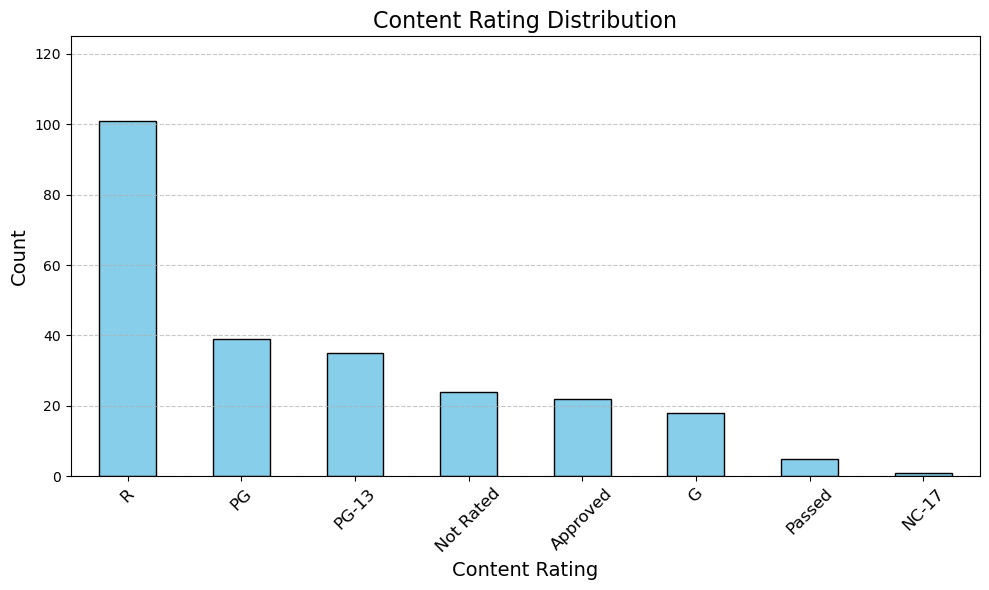

In [4]:
x1 = df['Content_Rating'].value_counts()
print(x1)

plt.figure(figsize=(10, 6))
x1.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Content Rating Distribution', fontsize=16)
plt.xlabel('Content Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0,125)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
